# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [235]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('/Users/vasanthibodasingi/Desktop/LaunchCode/Womens+/call-center-cleanup-assignment/NorthCallCenter.csv')
south_df = pd.read_csv('/Users/vasanthibodasingi/Desktop/LaunchCode/Womens+/call-center-cleanup-assignment/SouthCallCenter.csv')



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [236]:
#Code Used:


north_df['Rep ID'].describe()
n1= len(pd.unique(north_df['Rep ID']))
print("reps in the North branch" ,n1)

reps in the North branch 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [237]:
#Code Used:
n2 = len(pd.unique(south_df['Rep ID']))
print("reps in the South branch",n2)

reps in the South branch 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 9.987755	1.914286	3.048780	2.967347

In [238]:
#Code Used:
north_df.describe()
print(north_df[('Busy Minutes')].mean(), north_df[('Not Ready Minutes')].mean(),
      north_df[('Incoming Wait Time')].mean(), north_df[('During Call Wait Time')].mean())



9.987755102040817 1.9142857142857144 3.048780487804878 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 10.05414	1.910828	3.000000	3.076433

In [239]:
#Code Used:
south_df.describe()

print(south_df[('Busy Minutes')].mean(), south_df[('Not Ready Minutes')].mean(),
      south_df[('Incoming Wait Time')].mean(), south_df[('During Call Wait Time')].mean())

10.054140127388536 1.910828025477707 3.0 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?
9:00 AM      10
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43


In [240]:
# Code Used:
frames = [north_df, south_df]
  
df = pd.concat(frames)


df2 = df.pivot_table(index = ['Time Block'], aggfunc ='size')
print(df2)


Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.987755			
> - Not Ready Minutes = 1.914286
> - Incoming Wait Time = 3.048780
> - During Call Wait Time = 2.967347
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05414				
> - Not Ready Minutes = 1.910828
> - Incoming Wait Time = 3.000000
> - During Call Wait Time = 3.076433
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in the Incoming Wait Time column, These are NaN because they belong to outgoing calls, I would convert the values from NaN to 0 so that all the data is numeric to perform analysis 

In [241]:
# Code Used
#df.isnull( ).sum( )#351

# Add Additional Cells as needed.




df = df.fillna(0)
south_df = south_df.fillna(0)
north_df = north_df.fillna(0)
df.isnull().sum()



#df.drop('Unnamed', axis=1, inplace=True)
# north_df.drop(['Unnamed: 0'], axis=1)
# south_df.drop(['Unnamed: 0'], axis=1)


Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: To maintain consistancy in the data, I replaced the "YES " value containing space with "YES" using str.strip() function


In [242]:
#Code Used

north_df['Sale']
values = pd.unique(north_df['Sale'])
print("sale values in the North branch" ,values)

# Add Additional Cells as needed.
north_df['Sale'] = north_df['Sale'].str.strip()
values1 = pd.unique(north_df['Sale'])
print("sale values in the North branch" ,values1)


sale values in the North branch ['NO' 'YES ' 'YES']
sale values in the North branch ['NO' 'YES']


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Yes there are duplicates in the two data sets. I dropped the duplicates.

In [243]:
#Code Used
duplicates1 = north_df.duplicated()
duplicates2 = south_df.duplicated()
duplicates3 = df.duplicated()
duplicates1.sum()
duplicates2.sum()
duplicates3.sum()

# Add Additional Cells as needed.

#dropping duplicate values 
df = df.drop_duplicates()
north_df = north_df.drop_duplicates()
south_df = south_df.drop_duplicates()
duplicates1 = north_df.duplicated()
duplicates1.sum()
duplicates2 = south_df.duplicated()
duplicates2.sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 

In [244]:
#Code Used
# Add Additional Cells as needed.

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [245]:
# Create dataframe for the entire company named df

frames = [north_df, south_df]
  
df = pd.concat(frames)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             559 non-null    int64  
 1   Branch                 559 non-null    object 
 2   Call Purpose           559 non-null    object 
 3   Time Block             559 non-null    object 
 4   Incoming or Outgoing   559 non-null    object 
 5   Queue                  559 non-null    object 
 6   Rep ID                 559 non-null    object 
 7   Sale                   559 non-null    object 
 8   Lost Call              559 non-null    int64  
 9   Abandoned              559 non-null    int64  
 10  Busy Minutes           559 non-null    int64  
 11  Not Ready Minutes      559 non-null    int64  
 12  Incoming Wait Time     559 non-null    float64
 13  During Call Wait Time  559 non-null    int64  
 14  Calls                  559 non-null    int64  
dtypes: flo

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent--> 37
- South Branch = Eric --> 35


In [246]:
# Code Used
gb1 = df.groupby("Rep ID")
gb1.first()
north_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)
south_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)

# Add Additional Cells as needed.

/var/folders/4_/csfhcjc13fggd9xsvd410f8w0000gn/T/ipykernel_4470/191660096.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  north_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)
/var/folders/4_/csfhcjc13fggd9xsvd410f8w0000gn/T/ipykernel_4470/191660096.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  south_df.groupby(["Rep ID"]).sum().sort_values("Calls", ascending=False)


,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35
Randy,4576,3,1,320,66,47.0,98,33
Sandy,4694,1,0,325,60,34.0,100,32
Helga,5236,0,2,292,58,36.0,95,31
George,4620,0,0,298,53,41.0,87,29
Kate,4615,0,0,291,61,37.0,83,29
Karl,4532,1,0,287,61,26.0,85,28
Josh,3960,3,0,260,50,31.0,83,26
Susan,4006,2,0,267,53,35.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.857%
- South Branch = 1.273%
- Company Wide = 1.967%
- Do any of these fall out of the optimal range of 2-5%? -->south branch has average call abandoned rate as 1.27%

In [268]:
# Code Used





c1 = df['Abandoned'].value_counts()
c1
cn = north_df['Abandoned'].value_counts()
cn
cs = south_df['Abandoned'].value_counts()
cs

ac = (df['Abandoned'] == 1).sum()
ac
tc = (df['Calls'] == 1).sum()
tc
print("%calls abandoned in company", (ac/tc)*100)


acn =(north_df['Abandoned'] == 1).sum()
acn
tcn = (north_df['Calls'] == 1).sum()
tcn
print("%calls abandoned in north branch", (acn/tcn)*100)

acs =(south_df['Abandoned'] == 1).sum()
acs
tcs = (south_df['Calls'] == 1).sum()
tcs
print("%calls abandoned in south brnach", (acs/tcs)*100)




# Add Additional Cells as needed.

%calls abandoned in company 1.9677996422182469
%calls abandoned in north branch 2.857142857142857
%calls abandoned in south brnach 1.2738853503184715


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 33 , 40.24%
- South Branch = 48 , 38.09%
- Company Wide = 81 , 38.94%

In [280]:
# Code Used



# Get count of values less than 2 in the column 
count1 = north_df['Incoming Wait Time'][north_df['Incoming Wait Time'] <= 2].count()
           
#total incoming calls    
counttotal1 = north_df['Incoming or Outgoing'][north_df['Incoming or Outgoing'] == 'Incoming'].count()
counttotal1
#percentage
p1 =(count1/counttotal1)*100
print("p1 is",p1,count1 )


# Get count of values less than 2 in the column 
count2 = south_df['Incoming Wait Time'][south_df['Incoming Wait Time'] <= 2].count()
count2           
#total incoming calls    
counttotal2 = south_df['Incoming or Outgoing'][south_df['Incoming or Outgoing'] == 'Incoming'].count()
counttotal2
#percentage
p2 =(count2/counttotal2)*100
print("p2 is",p2,count2)

# Get count of values greater than 2 in the column 
count3 = df['Incoming Wait Time'][df['Incoming Wait Time'] <= 2].count()
            
#total incoming calls    
counttotal3 = df['Incoming or Outgoing'][df['Incoming or Outgoing'] == 'Incoming'].count()
counttotal3
#percentage
p3 =(count3/counttotal3)*100
print("p3 is",p3,count3)

#south_df[south_df['Incoming Wait Time'] <= 2.0].count()
#south_df[south_df['Incoming or Outgoing'] == 'Incoming'].count()

df.head(10)


p1 is 239.02439024390242 196
p2 is 187.3015873015873 236
p3 is 207.6923076923077 432


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
5,5,North,Product Support,2:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,2,1
6,6,North,Product Support,2:00 PM,Incoming,A,Joe,NO,0,0,8,1,1.0,3,1
7,7,North,Product Support,2:00 PM,Incoming,B,Lilly,NO,0,0,11,2,1.0,3,1
8,8,North,Product Support,3:00 PM,Incoming,B,Duke,NO,0,0,12,2,1.0,4,1
9,9,North,Product Support,3:00 PM,Incoming,A,Cam,NO,0,0,11,3,1.0,4,1


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 715.142 seconds
- South Branch in seconds = 719.101 seconds
- Company Wide in seconds = 717.366 seconds


In [302]:
## Code Used 
# outgoing = busy minutes + not ready minutes
# incoming = busy minutes + not ready minutes + incoming call wait time



cdf = df['Calls'].sum()
cndf = north_df['Calls'].sum()
csdf = south_df['Calls'].sum()
cdf,cndf,csdf


#finding total wait time for each call in north,south and company
sumdf = df['Busy Minutes'] + df['Not Ready Minutes'] + df['Incoming Wait Time']/60

sumndf = north_df['Busy Minutes'] + north_df['Not Ready Minutes'] + north_df['Incoming Wait Time']/60

sumsdf = south_df['Busy Minutes'] + south_df['Not Ready Minutes'] + south_df['Incoming Wait Time']/60

#totalling the call wait times for the north,south and company
s1 = sumdf.sum()
s2 = sumndf.sum()
s3 = sumsdf.sum()

#finding average speed of answer for north, south and company

print("average speed of answer company wide: ",(s1/cdf)*60)
print("average speed of answer north branch: ",(s2/cndf)*60)
print("average speed of answer south branch: ",(s3/csdf)*60)




average speed of answer company wide:  717.366726296959
average speed of answer north branch:  715.1428571428571
average speed of answer south branch:  719.1019108280254


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

/var/folders/4_/csfhcjc13fggd9xsvd410f8w0000gn/T/ipykernel_4470/2411519973.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


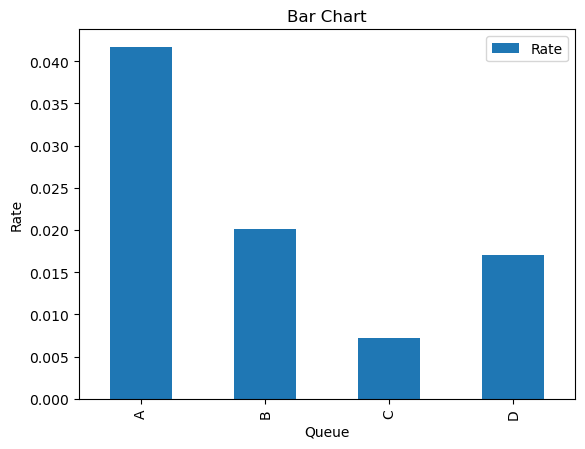

In [250]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
rate = [0,0,0,0]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 
    rate[i] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
#Your Code Here:

data = {'Queue': queues,
        'Rate': rate}
df1 = pd.DataFrame(data)

# Generate the bar chart
df1.plot(kind='bar', x='Queue', y='Rate')

# Customize the plot
plt.xlabel('Queue')
plt.ylabel('Rate')
plt.title('Bar Chart')
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [251]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:


NameError: name 'north' is not defined

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: